In [2]:
#Importing Libraries:-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Loading the Dataset:-
df=pd.read_csv('C:/Users/dell/Desktop/capstone/CAR DETAILS.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
#Analysing and cleaning the Dataset:-
# Checking the Datatypes:-

df.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [5]:
# Checking the shape of dataset:-
df.shape

(4340, 8)

In [6]:
## Checking the null values:-
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [7]:
# Checking the categorical columns:-
df['fuel'].value_counts()

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64

In [8]:
df['transmission'].value_counts()

Manual       3892
Automatic     448
Name: transmission, dtype: int64

In [9]:
df['seller_type'].value_counts()

Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64

In [10]:
df['owner'].value_counts()

First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64

In [11]:
df['name'].value_counts().head()

Maruti Swift Dzire VDI    69
Maruti Alto 800 LXI       59
Maruti Alto LXi           47
Maruti Alto LX            35
Hyundai EON Era Plus      35
Name: name, dtype: int64

In [17]:
#Data Preprocessing:-
#converting all data in numerical form:-
from sklearn.preprocessing import LabelEncoder

In [26]:
# Making a copy of a dataframe:-
car_details=df.copy()

In [13]:
#car_details.drop(['selling_price','km_driven'],axis=1)

In [29]:
le=LabelEncoder()

In [30]:
car_details['transmission']=le.fit_transform(car_details['transmission'])
car_details['seller_type']=le.fit_transform(car_details['seller_type'])
car_details['fuel']=le.fit_transform(car_details['fuel'])
car_details['owner']=le.fit_transform(car_details['owner'])
car_details

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,4,1,1,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,4,1,1,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,0
3,Datsun RediGO T Option,2017,250000,46000,4,1,1,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,2
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,1,1,1,2
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,1,1,1,2
4337,Maruti 800 AC BSIII,2009,110000,83000,4,1,1,2
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,1,1,1,0


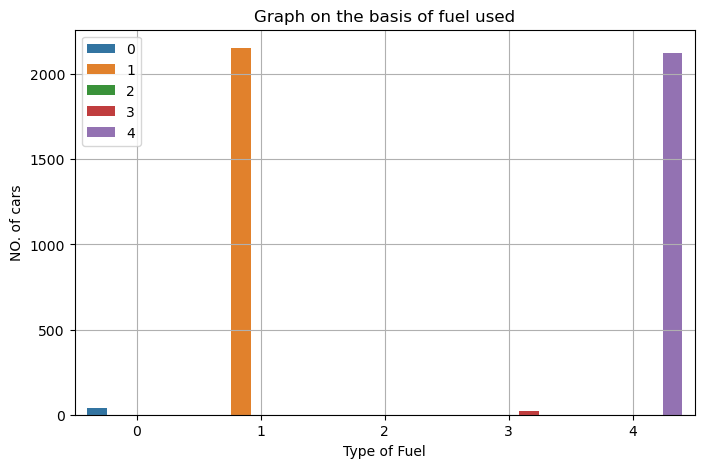

In [31]:
#Performing some EDA on Data:-
#Classify on the basis of fuel used:-
plt.figure(figsize=(8,5))
sns.countplot(data=car_details,x='fuel',hue='fuel')
plt.legend()
plt.grid()
plt.xlabel('Type of Fuel')
plt.ylabel('NO. of cars')
plt.title('Graph on the basis of fuel used')
plt.show()

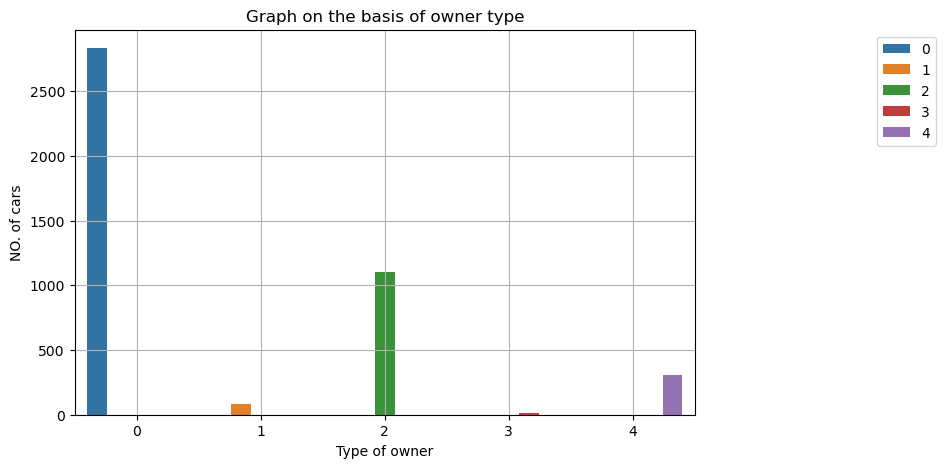

In [32]:
#Classify on the basis of owner type:-
plt.figure(figsize=(8,5))
sns.countplot(data=car_details,x='owner',hue='owner')
plt.legend(bbox_to_anchor=(1,0,0.4,1))
plt.grid()
plt.xlabel('Type of owner')
plt.ylabel('NO. of cars')
plt.title('Graph on the basis of owner type')
plt.show()

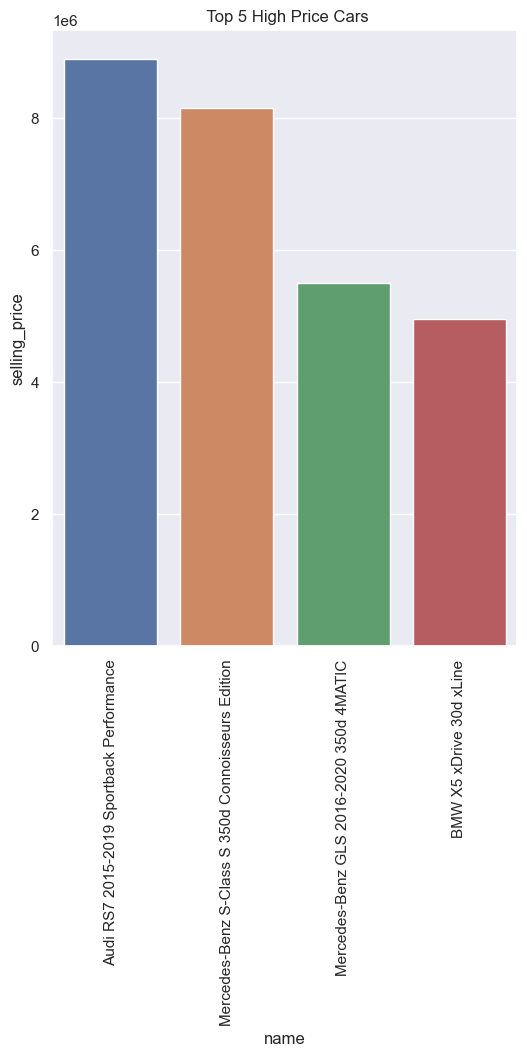

In [34]:
#Top 5 high price cars:-
r1=car_details[['name','selling_price']].sort_values(by='selling_price',ascending=False).head()
sns.set(rc={'figure.figsize':(6,8)})
sns.barplot(data=r1,x='name',y='selling_price')
plt.title(' Top 5 High Price Cars')
plt.xticks(rotation=90)
plt.show()

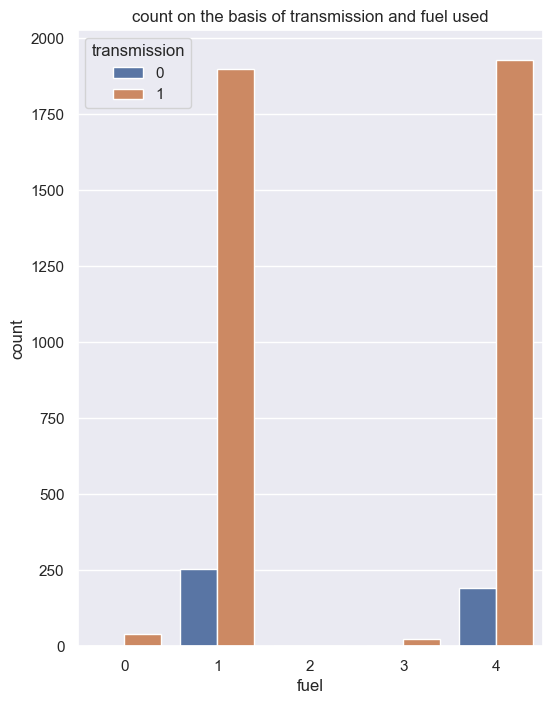

In [37]:
#Classify on the basis of transmission and fuel type:-
r2=car_details[['transmission','fuel']]
sns.countplot(data=r2,x='fuel',hue='transmission')
plt.title("count on the basis of transmission and fuel used")
plt.show()

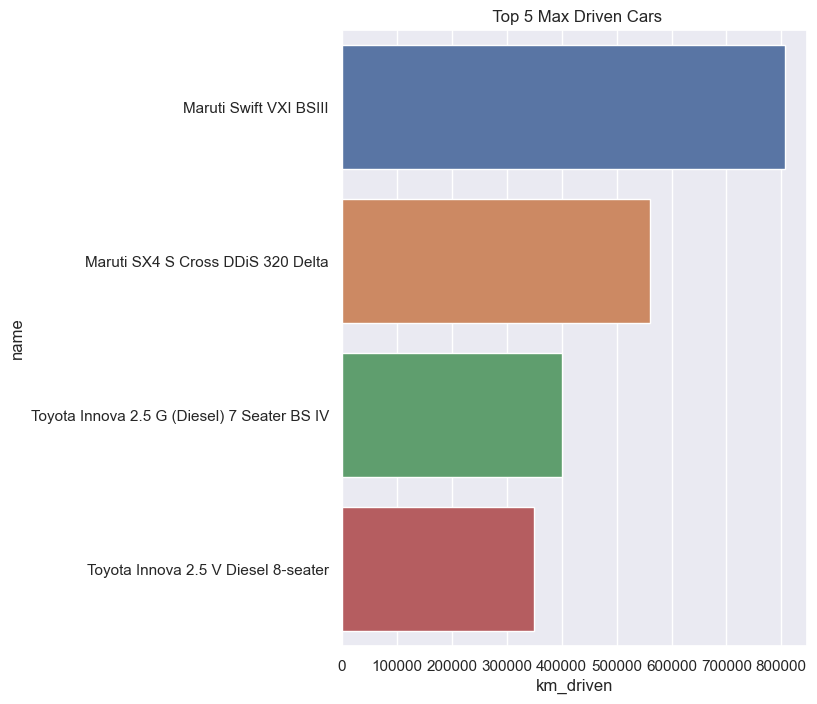

In [40]:
#Top 5 car with max driven km:-
r1=car_details[['name','km_driven']].sort_values(by='km_driven',ascending=False).head()
sns.set(rc={'figure.figsize':(6,8)})
sns.barplot(data=r1,x='km_driven',y='name')
plt.title(' Top 5 Max Driven Cars')
sns.set_style('whitegrid')
plt.show()

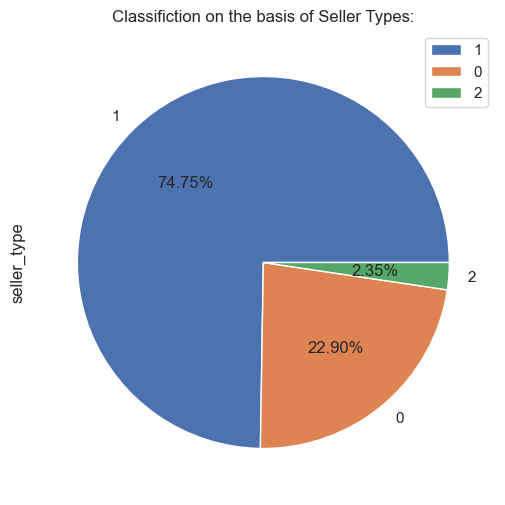

In [41]:
#Classify on the basis of seller type:-
r2=car_details['seller_type'].value_counts()
r2.plot.pie(autopct='%.2f%%',legend=True)
plt.legend(bbox_to_anchor=(1,0,0,1))
plt.title('Classifiction on the basis of Seller Types:')
plt.show()

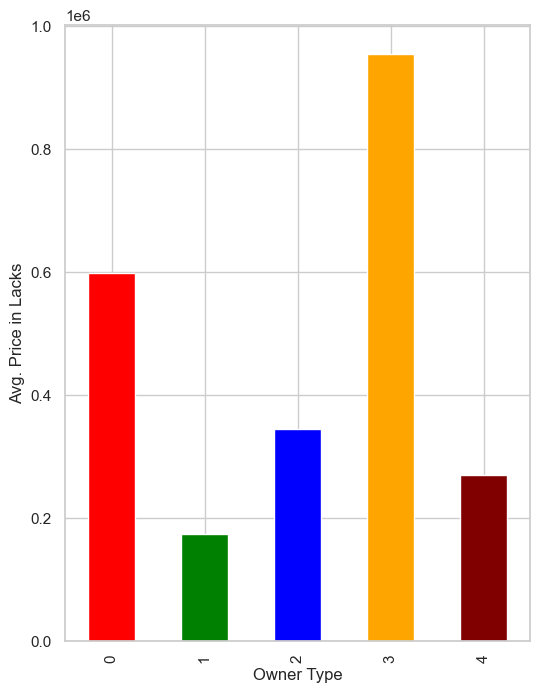

In [42]:
#Classification on the basis of owner type with avg car price:-
r4=car_details[['owner','selling_price']].groupby('owner')['selling_price'].mean()
r4.plot.bar(color=('red','green','blue','orange','maroon'))
plt.xlabel('Owner Type')
plt.ylabel('Avg. Price in Lacks')
plt.show()

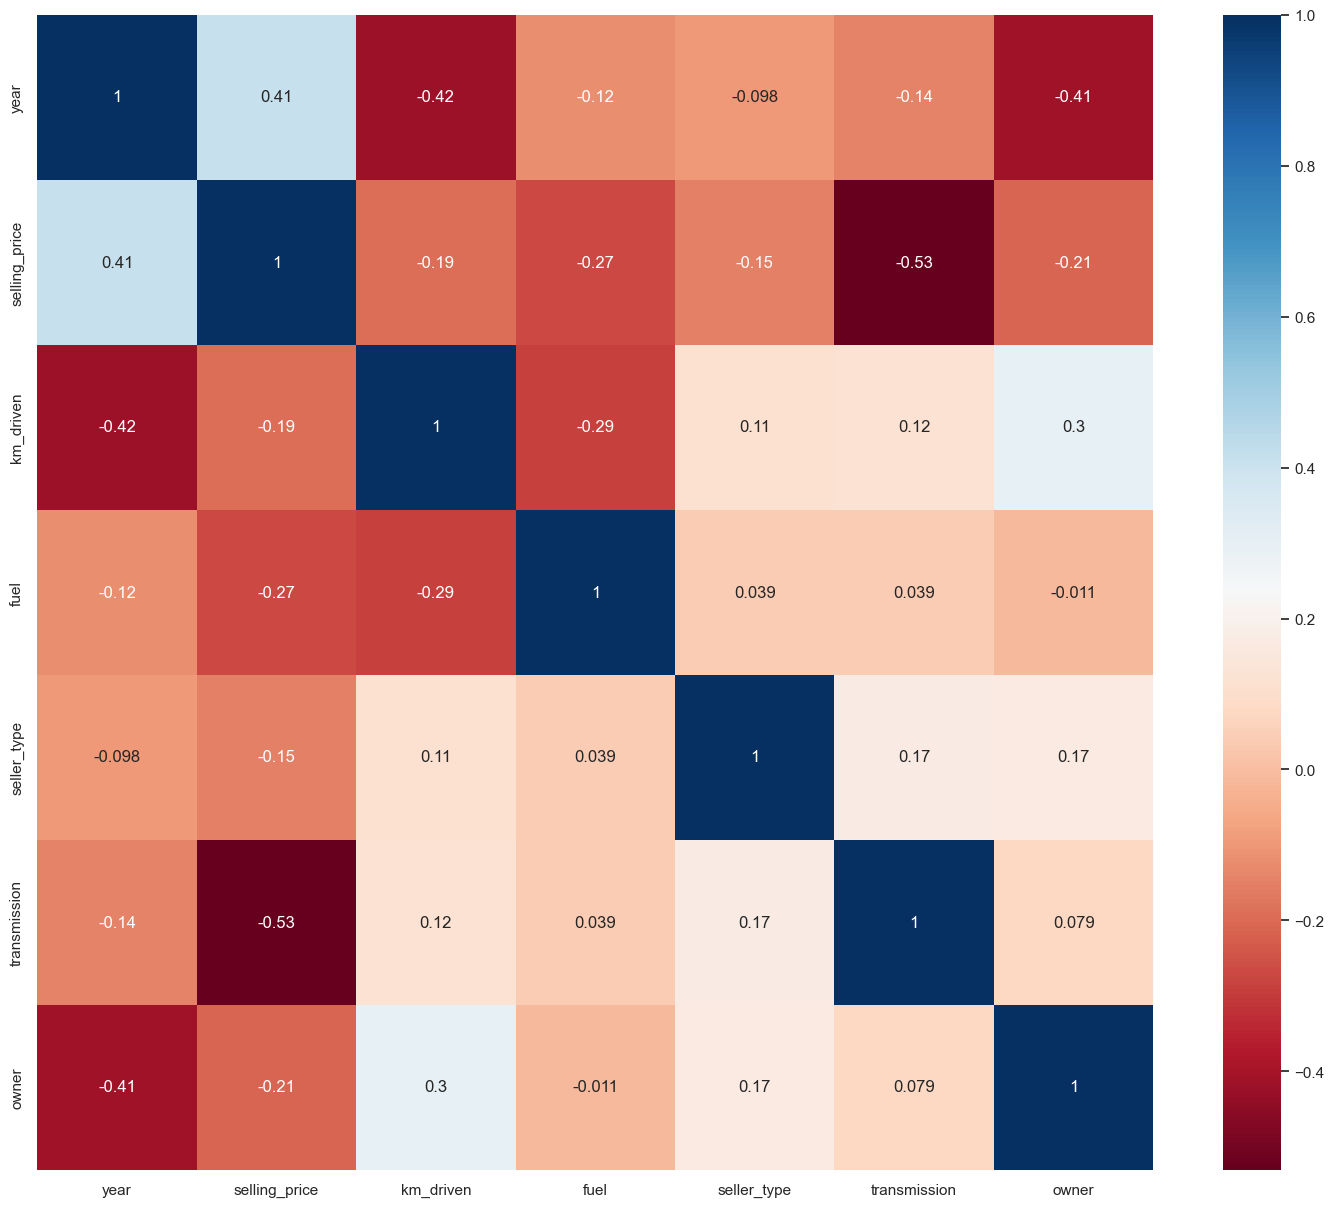

In [54]:
#Heatmap for checking corelation:-
corr=car_details.corr()
plt.figure(figsize=(18,15))
sns.heatmap(data=corr,annot=True,cmap='RdBu')
plt.show()

In [55]:
#Prepare Data for Machine Learning Model:-
#Selecting Independent x & Dependent y variables:-
x=car_details.drop(['selling_price','name'],axis=1)
y=car_details['selling_price']
print(x.shape,y.shape)
print(x)
print(y)

(4340, 6) (4340,)
      year  km_driven  fuel  seller_type  transmission  owner
0     2007      70000     4            1             1      0
1     2007      50000     4            1             1      0
2     2012     100000     1            1             1      0
3     2017      46000     4            1             1      0
4     2014     141000     1            1             1      2
...    ...        ...   ...          ...           ...    ...
4335  2014      80000     1            1             1      2
4336  2014      80000     1            1             1      2
4337  2009      83000     4            1             1      2
4338  2016      90000     1            1             1      0
4339  2016      40000     4            1             1      0

[4340 rows x 6 columns]
0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64


In [56]:
#Spilt the data into train and test format:-
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)
print('x_train_shape:',x_train.shape,'x-test_shape:',x_test.shape)
print('y_train_shape:',y_train.shape,'y_test_shape:',y_test.shape)

x_train_shape: (3038, 6) x-test_shape: (1302, 6)
y_train_shape: (3038,) y_test_shape: (1302,)


In [57]:
#Importing the Evalution metrics and creating a function for applying that:-
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
def met(y_test,y_pred):
    print(mean_squared_error(y_test,y_pred))
    print(mean_absolute_error(y_test,y_pred))
    print(r2_score(y_test,y_pred))
def mscore(model):
    print('Train Score',model.score(x_train,y_train))
    print('Test Score',model.score(x_test,y_test))


In [58]:
#Importing ML Models:-
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

In [59]:
#Applying the Linear Regression Model:-
lr=LinearRegression()
lr.fit(x_train,y_train)
LinearRegression()

LinearRegression()

In [62]:
# prediction the value:-
y_pred_lr=lr.predict(x_test)
print(y_pred_lr.shape)
(1302)
#Checking MAE , MSE, R2_score and Model score:-
met(y_test,y_pred_lr)

(1302,)
173866882037.95746
230733.57503859382
0.5003867295972508


In [63]:
mscore(lr)

Train Score 0.42440048821777265
Test Score 0.5003867295972508


In [64]:
#Applying KNN Model:-
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
KNeighborsRegressor()

KNeighborsRegressor()

In [66]:
# prediction the value:-
y_pred_knn=knn.predict(x_test)
print(y_pred_knn.shape)
(1302,)
#Checking MAE , MSE, R2_score and Model score:-
met(y_test,y_pred_knn)

(1302,)
206706920619.936
235450.79493087556
0.40601959720390157


In [67]:
mscore(knn)

Train Score 0.5828830810948729
Test Score 0.40601959720390157


In [68]:
#Applying Decision Tree Regressor Model:-
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
DecisionTreeRegressor()

DecisionTreeRegressor()

In [70]:
# prediction the value:-
y_pred_dt=dt.predict(x_test)
print(y_pred_dt.shape)
(1302,)
#Checking MAE , MSE, R2_score and Model score:-
met(y_test,y_pred_dt)

(1302,)
116739791078.53418
166685.61540931332
0.6645436547591216


In [71]:
mscore(dt)

Train Score 0.9614993716653182
Test Score 0.6645436547591216


In [72]:
#Applying Bagging Ensemble MOdel:-
bagg=BaggingRegressor(base_estimator=dt)
bagg.fit(x_train,y_train)
BaggingRegressor(base_estimator=DecisionTreeRegressor())

BaggingRegressor(base_estimator=DecisionTreeRegressor())

In [73]:
# prediction the value:-
y_pred_bagg=bagg.predict(x_test)
print(y_pred_bagg.shape)
(1302,)
#Checking MAE , MSE, R2_score and Model score:-
met(y_test,y_pred_bagg)

(1302,)
93186166858.9767
160188.58900638417
0.7322259130951367


In [74]:
mscore(bagg)

Train Score 0.8936634810998656
Test Score 0.7322259130951367


In [76]:
#Checking the best Model:
best_mod=pd.DataFrame({'Model Name':['Linear Regression','KNN','Decision Tree Regressor','Bagging Regression'],'Train Score':[lr.score(x_train,y_train),knn.score(x_train,y_train),dt.score(x_train,y_train),bagg.score(x_train,y_train)],'Test Socre':[lr.score(x_test,y_test),knn.score(x_test,y_test),dt.score(x_test,y_test),bagg.score(x_test,y_test)]})
best_mod.head()

,Model Name,Train Score,Test Socre
0,Linear Regression,0.424400,0.500387
1,KNN,0.582883,0.406020
2,Decision Tree Regressor,0.961499,0.664544
3,Bagging Regression,0.893663,0.732226


Best Model is Bagging Regressor

In [77]:
#Saving the best Model (Bagging Regressor):-
import pickle
pickle.dump(bagg,open('bagging.pkl','wb'))
loaded_model=pickle.load(open('bagging.pkl','rb'))
result=loaded_model.score(x_train,y_train)
print(result)

0.8936634810998656


In [79]:
#Creating a random dataset by selecting 20 data and checking best Model on it:-
rand_20=car_details[250:270]
rand_20.to_csv('rand_20.csv')
rand_20

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
250,Maruti Omni MPI STD BSIV,2018,200000,10000,4,1,1,0
251,Maruti Baleno Alpha 1.2,2017,625000,52000,4,0,1,0
252,Ford Fiesta Classic 1.4 SXI Duratorq,2006,110000,120000,1,1,1,4
253,Hyundai Elite i20 Asta Option BSIV,2019,800000,11240,4,1,1,0
254,Hyundai Grand i10 CRDi Magna,2017,490000,66000,1,0,1,0
255,Maruti Ertiga SHVS ZDI,2017,880000,64000,1,0,1,0
256,Hyundai Santro Xing GL Plus,2013,290000,49000,4,1,1,0
257,Tata Sumo GX TC 7 Str BSIII,2006,115999,100000,1,1,1,2
258,Renault KWID RXT,2018,360000,26500,4,1,1,0
259,Maruti 800 AC,2002,65000,100000,4,1,1,2


In [81]:
#Selecting x and y in random dataset:-
x1=rand_20.drop(['selling_price','name'],axis=1)
y1=rand_20['selling_price']
print(x.shape,y.shape)

(4340, 6) (4340,)


In [82]:
#Spliting the random dataset:-
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.25,random_state=1)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(15, 6) (5, 6)
(15,) (5,)


In [83]:
#Applying the saved best model:-
result=loaded_model.score(x_train,y_train)
print(result)

0.8076336810543251
